In [16]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential, load_model

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale

import warnings

warnings.filterwarnings('ignore')

<h3>1) Data preparation and stardartization</h3>

In [17]:
df = pd.read_csv('./data/regresion_data.csv')

df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='label')

df

,axial_max,tang_max,index_of_axm,index_of_tnm,axial_in_mxt,tang_in_mxa,cone_angl,frequancy
0,-16.549675,-17.654378,28,48,-10.975493,-16.597827,4,126.984123
1,-16.564726,-17.815883,28,52,-14.410172,-16.724255,4,126.984123
2,-16.335568,-17.578816,28,50,-12.664116,-16.415995,4,125.152626
3,-15.968865,-17.108087,28,47,-10.236513,-15.878571,4,120.879120
4,-15.227270,-16.266240,28,49,-12.056063,-15.246275,4,114.774117
...,...,...,...,...,...,...,...,...
701,-12.023019,-7.729243,22,39,-9.648130,-6.059585,15,76.312576
702,-12.288681,-7.505596,25,40,-10.345298,-5.331225,15,77.533577
703,-12.301400,-7.318260,23,40,-10.514462,-5.200852,15,78.754578
704,-12.464419,-6.943085,23,39,-9.774318,-4.769759,15,77.533577


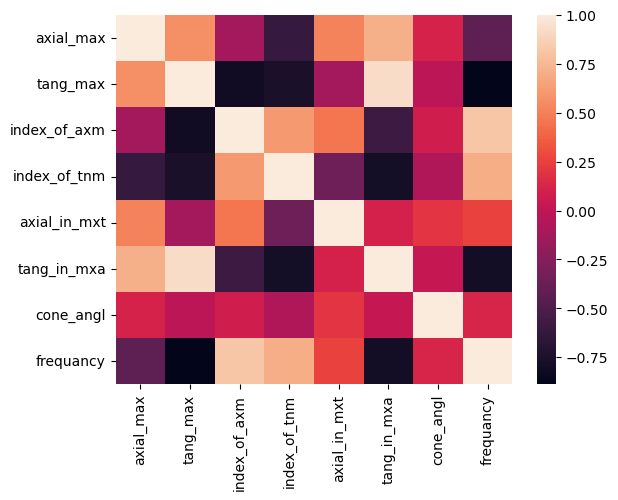

In [18]:
# Let's build correlation and some graphs
sns.heatmap(df.corr())

# And some estimators
print()

In [19]:
X = df.drop(columns='frequancy')
y = df['frequancy']



# standartization and train test split
mean = X.mean(axis=0)
std = X.std(axis=0)
X -= mean
X /= std
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape[1])


7


<h3>2) Simple model for regression</h3>

In [20]:
model = Sequential()
'''
model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(0.25))
model.add(Dense(512, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
'''
model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))

model.add(Dense(14, activation='relu'))

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])



In [21]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=1200)

Epoch 1/1200
15/15 [==============================] - 1s 10ms/step - loss: 6685.2002 - mse: 6685.2002 - mae: 67.5964 - val_loss: 5607.3701 - val_mse: 5607.3701 - val_mae: 57.2491
Epoch 2/1200
15/15 [==============================] - 0s 2ms/step - loss: 6604.7627 - mse: 6604.7627 - mae: 67.3236 - val_loss: 5520.8931 - val_mse: 5520.8931 - val_mae: 57.0373
Epoch 3/1200
15/15 [==============================] - 0s 2ms/step - loss: 6467.9824 - mse: 6467.9824 - mae: 66.8825 - val_loss: 5363.8584 - val_mse: 5363.8584 - val_mae: 56.6384
Epoch 4/1200
15/15 [==============================] - 0s 3ms/step - loss: 6210.1309 - mse: 6210.1309 - mae: 65.9721 - val_loss: 5066.9321 - val_mse: 5066.9321 - val_mae: 55.8048
Epoch 5/1200
15/15 [==============================] - 0s 2ms/step - loss: 5721.5874 - mse: 5721.5874 - mae: 64.0293 - val_loss: 4487.6362 - val_mse: 4487.6362 - val_mae: 53.9121
Epoch 6/1200
15/15 [==============================] - 0s 2ms/step - loss: 4766.5054 - mse: 4766.5054 - mae: 5

5/5 [==============================] - 0s 928us/step


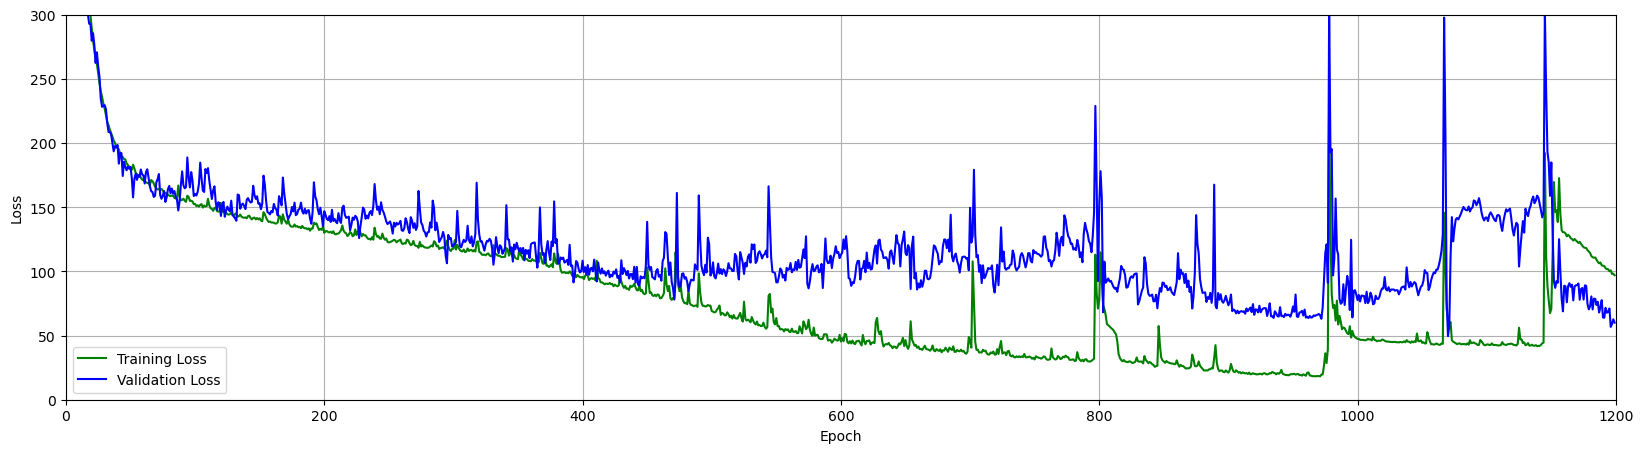

In [22]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 1200])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

y_pred = np.array(model.predict(X_test))

In [23]:
print(y_pred.shape)
print(y_pred.dtype)
print(type(y_pred))
print(Y_test.shape)

(142, 1)
float32
<class 'numpy.ndarray'>
(142,)


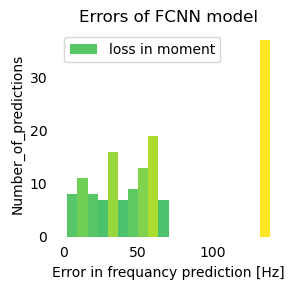

In [24]:
losses = y_pred[0] - Y_test
'''
for i in range(len(losses)):
    if(losses[i] >= 25):
        losses[i] = 0
'''
fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors of FCNN model')
 
# Show plot
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 14)                112       
                                                                 
 dense_15 (Dense)            (None, 7)                 105       
                                                                 
 dense_16 (Dense)            (None, 7)                 56        
                                                                 
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 4)                

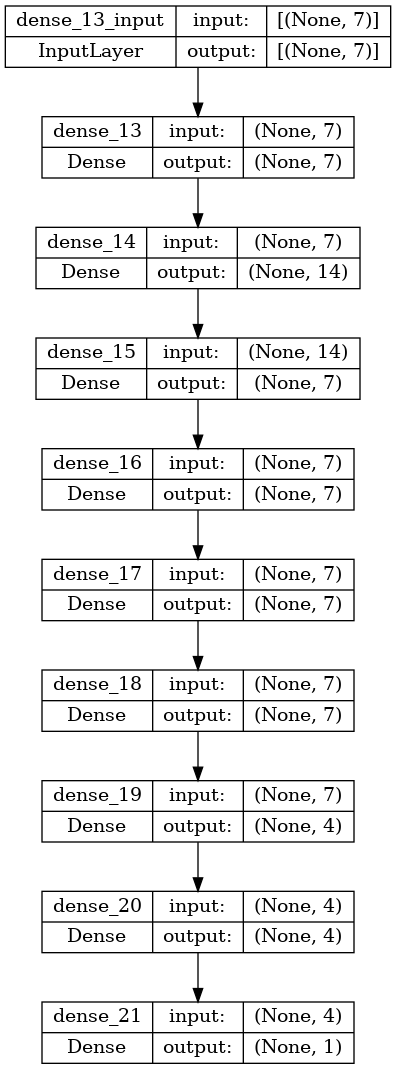

In [25]:
from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from keras_visualizer import visualizer 
from keras import layers 
from keras.utils import plot_model

print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<h3>3) Recurent Regression model  </h3>

In [26]:
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau
model = Sequential()

model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))

model.add(Dense(64,
                activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(16,
                activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(1))


In [27]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mse', 'mae'])

history = model.fit(X_train, Y_train, validation_split=0.4, epochs=1200, batch_size = 100)


Epoch 1/1200
4/4 [==============================] - 1s 38ms/step - loss: 6904.4097 - mse: 6904.1553 - mae: 69.3949 - val_loss: 5986.8755 - val_mse: 5986.7515 - val_mae: 60.9221
Epoch 2/1200
4/4 [==============================] - 0s 7ms/step - loss: 6860.9829 - mse: 6860.7241 - mae: 69.3511 - val_loss: 5972.5962 - val_mse: 5972.4717 - val_mae: 60.8421
Epoch 3/1200
4/4 [==============================] - 0s 6ms/step - loss: 6826.1079 - mse: 6825.8423 - mae: 69.3036 - val_loss: 5957.5098 - val_mse: 5957.3838 - val_mae: 60.7777
Epoch 4/1200
4/4 [==============================] - 0s 7ms/step - loss: 6795.0591 - mse: 6794.7861 - mae: 69.2661 - val_loss: 5942.3911 - val_mse: 5942.2627 - val_mae: 60.7310
Epoch 5/1200
4/4 [==============================] - 0s 7ms/step - loss: 6765.2266 - mse: 6764.9409 - mae: 69.2353 - val_loss: 5927.7622 - val_mse: 5927.6318 - val_mae: 60.6888
Epoch 6/1200
4/4 [==============================] - 0s 6ms/step - loss: 6745.6455 - mse: 6745.3496 - mae: 69.2102 - val

4/4 [==============================] - 0s 12ms/step - loss: 6282.7417 - mse: 6282.4019 - mae: 68.1880 - val_loss: 5633.3110 - val_mse: 5633.1011 - val_mae: 60.7516
Epoch 52/1200
4/4 [==============================] - 0s 10ms/step - loss: 6270.4004 - mse: 6270.0591 - mae: 68.1708 - val_loss: 5621.2935 - val_mse: 5621.0815 - val_mae: 60.7368
Epoch 53/1200
4/4 [==============================] - 0s 8ms/step - loss: 6261.7559 - mse: 6261.4150 - mae: 68.1374 - val_loss: 5610.5723 - val_mse: 5610.3574 - val_mae: 60.7244
Epoch 54/1200
4/4 [==============================] - 0s 7ms/step - loss: 6249.2949 - mse: 6248.9536 - mae: 68.1170 - val_loss: 5600.2256 - val_mse: 5600.0083 - val_mae: 60.7168
Epoch 55/1200
4/4 [==============================] - 0s 7ms/step - loss: 6239.0630 - mse: 6238.7212 - mae: 68.0889 - val_loss: 5588.8550 - val_mse: 5588.6348 - val_mae: 60.7085
Epoch 56/1200
4/4 [==============================] - 0s 7ms/step - loss: 6229.2754 - mse: 6228.9321 - mae: 68.0567 - val_loss: 

5/5 [==============================] - 0s 920us/step


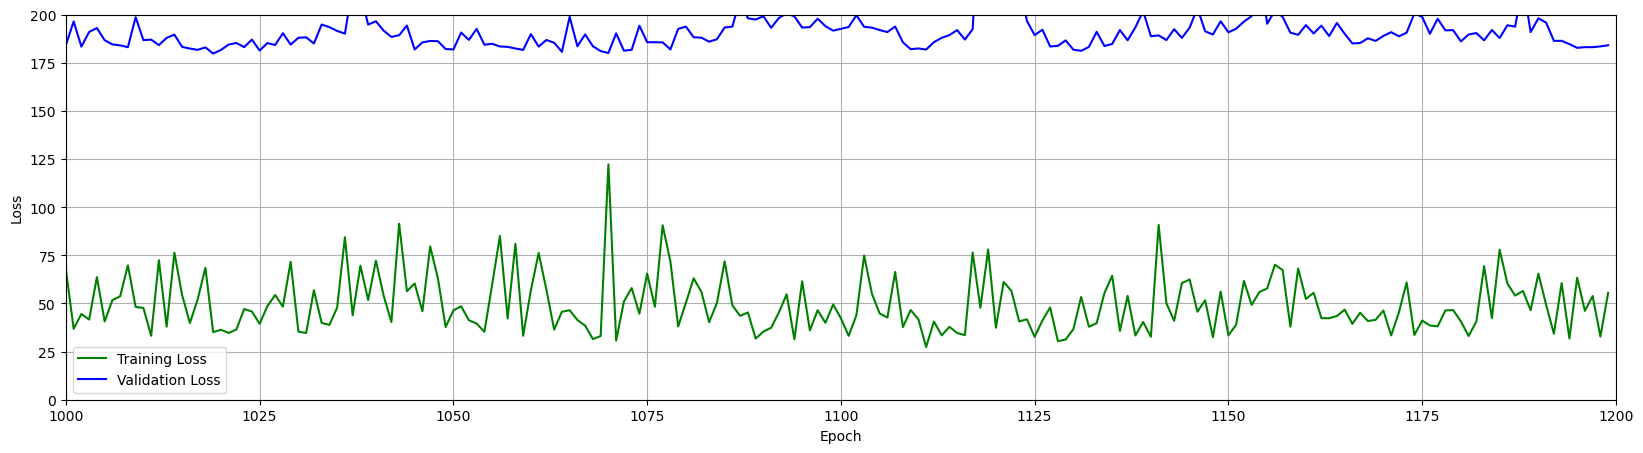

In [28]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([1000, 1200])
    plt.ylim([0, 200])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

y_pred = np.array(model.predict(X_test))

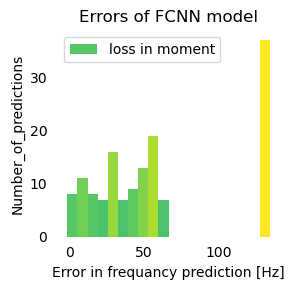

In [29]:
losses = np.array(y_pred[0] - Y_test)

fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors of FCNN model')
 
# Show plot
plt.show()

In [30]:
print(losses.shape)
print(type(losses))

(142,)
<class 'numpy.ndarray'>
